Data loaded successfully.
Training on 117 countries, Testing on 30 countries.

Running Linear Regression
Linear Regression R² Score: -0.1381
Linear Regression RMSE: 1.1497

Top 5 Influential Factors (Linear Regression):
                          Feature  Coefficient
        other_greenhouse_emisions     3.350261
                     CO2_emisions    -3.078739
                       population    -0.669951
                 rural_population     0.299146
              human_capital_index     0.290189
       logistic_performance_index     0.283329
   control_of_corruption_estimate    -0.275417
        control_of_corruption_std     0.268880
           access_to_electricity%     0.213630
voice_and_accountability_estimate     0.201497
--------------------------------------------------

Running Random Forest Regressor
Random Forest R² Score: 0.6956
Random Forest RMSE: 0.5946

Feature Importance plot saved to 'feature_importance_RF.png'
Comparison plot saved to 'model_comparison.png'


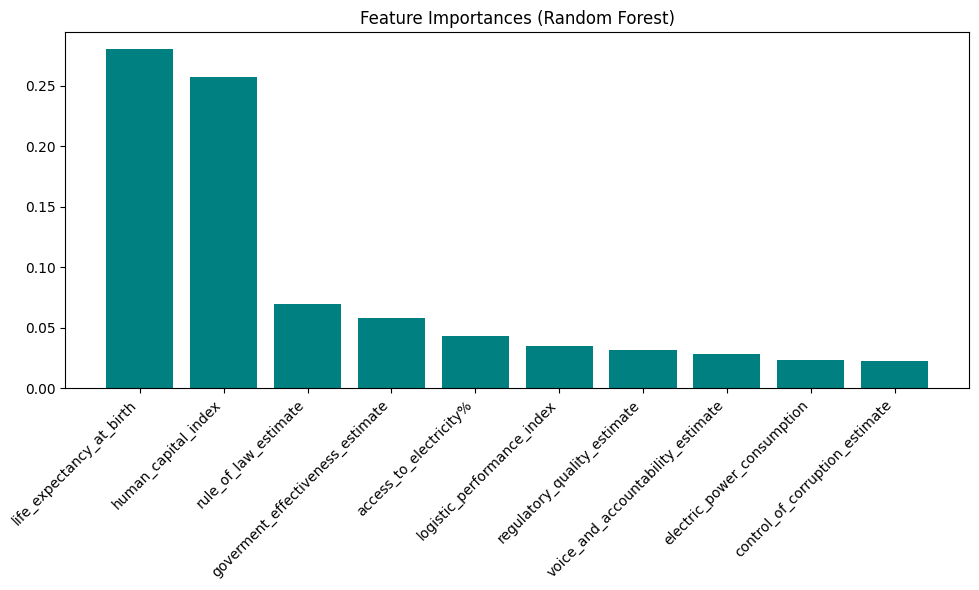

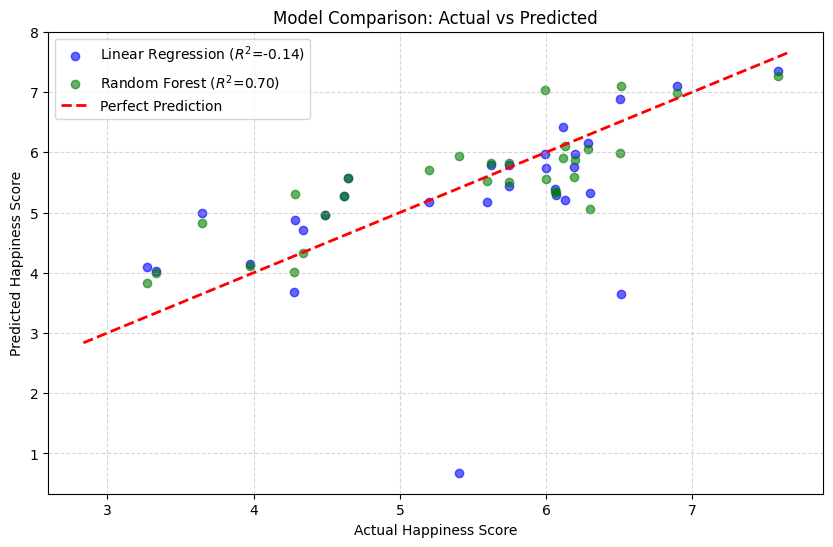

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. Load the Data
input_file = "A.csv"
try:
    df = pd.read_csv(input_file, index_col=0)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: {input_file} not found. Please run your previous script first.")
    exit()

# 2. Preprocessing
# We need to drop the target column from X (features) and keep it as y (label)
target_col = 'Life_Evaluation_Avg'

cols_to_drop = [target_col] 

X = df.select_dtypes(include=[np.number]).drop(columns=[target_col], errors='ignore')
y = df[target_col]

X = X.fillna(X.mean())

# Split data into Training (80%) and Testing (20%) sets (According to CS412)
# random_state=42 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (Important for Linear Regression to compare coefficients)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training on {len(X_train)} countries, Testing on {len(X_test)} countries.\n")

# Linear Regression - Basic
print("Running Linear Regression")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression R² Score: {r2_lr:.4f}")
print(f"Linear Regression RMSE: {np.sqrt(mse_lr):.4f}")

# Visualize Coefficients 
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(10)

print("\nTop 5 Influential Factors (Linear Regression):")
print(coef_df[['Feature', 'Coefficient']].to_string(index=False))
print("-" * 50)

# Random Forest - Quite complicated

print("\nRunning Random Forest Regressor")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) 
y_pred_rf = rf_model.predict(X_test)

# Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest R² Score: {r2_rf:.4f}")
print(f"Random Forest RMSE: {np.sqrt(mse_rf):.4f}")

# Visualize Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 10

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(top_n), importances[indices[:top_n]], align="center", color='teal')
plt.xticks(range(top_n), X.columns[indices[:top_n]], rotation=45, ha='right')
plt.tight_layout()
plt.savefig("feature_importance_RF.png")
print("\nFeature Importance plot saved to 'feature_importance_RF.png'")

# Comparison
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, label=f'Linear Regression ($R^2$={r2_lr:.2f})', color='blue')
plt.scatter(y_test, y_pred_rf, alpha=0.6, label=f'Random Forest ($R^2$={r2_rf:.2f})', color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Model Comparison: Actual vs Predicted")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("model_comparison.png")
print("Comparison plot saved to 'model_comparison.png'")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# 1. Load and Train on ALL Data
print("--")
print("Loading data and training models.")
print("--")
input_file = "A.csv"
try:
    df = pd.read_csv(input_file, index_col=0)
except FileNotFoundError:
    print("Error: A.csv not found.")
    exit()

target_col = 'Life_Evaluation_Avg'
# Select only numeric columns
train_df = df.select_dtypes(include=[np.number]).fillna(df.mean(numeric_only=True))

X = train_df.drop(columns=[target_col], errors='ignore')
y = train_df[target_col]

# Train Linear Regression (Scaled)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)

# Train Random Forest (Unscaled)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# 2. Identify Top 5 Key Drivers
# We use Random Forest to tell us which inputs actually matter
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
top_5 = feature_importance.sort_values(by='importance', ascending=False).head(5)
top_features = top_5['feature'].tolist()

print("--")
print(f"Top 5 drivers of happiness:")
for i, f in enumerate(top_features, 1):
    print(f"{i}. {f}")
print("--")

# 3. User Input Loop
cont = True
while cont:
    print("\nEnter values for a hypothetical country")
    print("(Type 'exit' to quit)\n")
    
    # Create a single row of data filled with averages
    input_data = X.mean().to_dict()
    
    # We use a flag to know if we should skip the prediction part
    aborted = False

    try:
        for feature in top_features:
            # If we already decided to abort, stop asking questions
            if aborted: 
                break

            min_val = X[feature].min()
            max_val = X[feature].max()
            
            user_val = input(f"Enter value for '{feature}' (Range: {min_val:.2f} - {max_val:.2f}): ")
            
            if user_val.lower() == 'exit':
                cont = False    # Stop the main while loop
                aborted = True  # Flag to skip prediction
                break           # Break out 
            else:
                input_data[feature] = float(user_val)
        
        if not cont:
            print("Exiting tool...")
            break

    except ValueError:
        print("Invalid input! Please enter a number.")
        continue

    # 4. Make Prediction (Only if we didn't abort)
    if not aborted:
        input_df = pd.DataFrame([input_data])
        
        # Predict Linear Regression
        input_scaled = scaler.transform(input_df)
        pred_lr = lr_model.predict(input_scaled)[0]
        
        # Predict Random Forest
        pred_rf = rf_model.predict(input_df)[0]
        
        print("--")
        print(f"Linear Regression: {pred_lr:.2f}")
        print(f"Random Forest:     {pred_rf:.2f}")
        print("--")
        
        if pred_rf > 7:
            print("Result: Very Happy Country!")
        elif pred_rf > 5:
            print("Result: Moderately Happy Country.")
        else:
            print("Result: Struggling Country.")

--
Loading data and training models.
--
--
Top 5 drivers of happiness:
1. life_expectancy_at_birth
2. human_capital_index
3. access_to_electricity%
4. goverment_effectiveness_estimate
5. individuals_using_internet%
--

Enter values for a hypothetical country
(Type 'exit' to quit)



Enter value for 'life_expectancy_at_birth' (Range: 51.90 - 83.95):  60
Enter value for 'human_capital_index' (Range: 0.29 - 0.88):  0.7
Enter value for 'access_to_electricity%' (Range: 5.38 - 100.00):  67
Enter value for 'goverment_effectiveness_estimate' (Range: -2.20 - 2.22):  1
Enter value for 'individuals_using_internet%' (Range: 1.69 - 98.33):  80


--
Linear Regression: 5.35
Random Forest:     5.05
--
Result: Moderately Happy Country.

Enter values for a hypothetical country
(Type 'exit' to quit)

